In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import TruncatedSVD

In [2]:
# Load the MNIST data set
mnist = fetch_openml('mnist_784', version=1)
X, Y = mnist['data'].to_numpy(), mnist['target'].to_numpy()

## Problem 1

In [3]:
# Reshaping each image into a column vector
X_reshaped = X.reshape(X.shape[0], -1)

In [4]:
# Performing SVD decomposition
U, S, Vt = np.linalg.svd(X_reshaped, full_matrices=False)

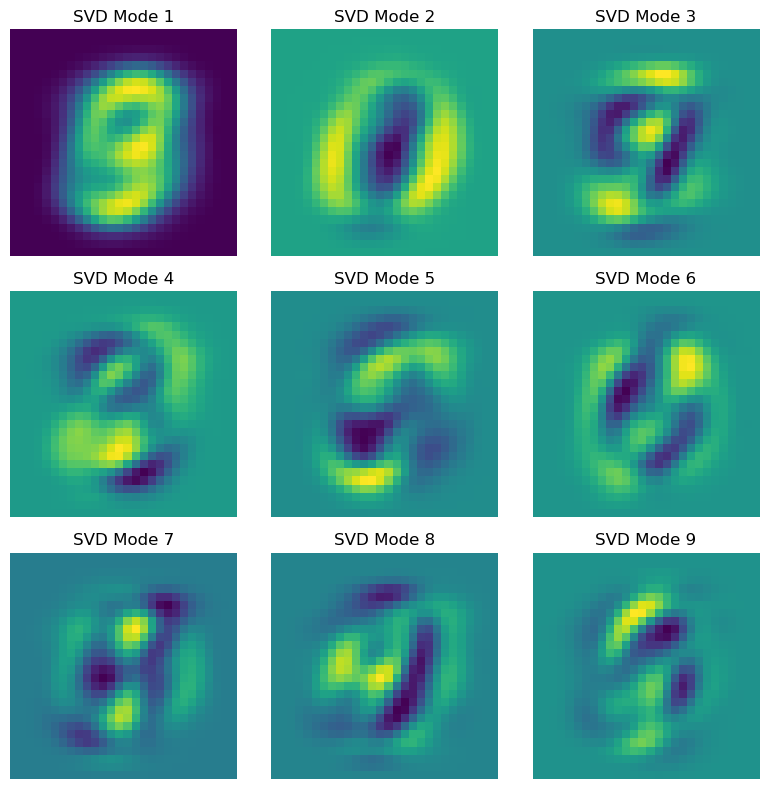

In [5]:
# Plotting the top 9 most important SVD modes
num_modes = 0
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    eigen_digit = Vt[i].reshape(28, 28)
    ax.imshow(eigen_digit)
    ax.set_title(f'SVD Mode {i + 1}')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

## Problem 2

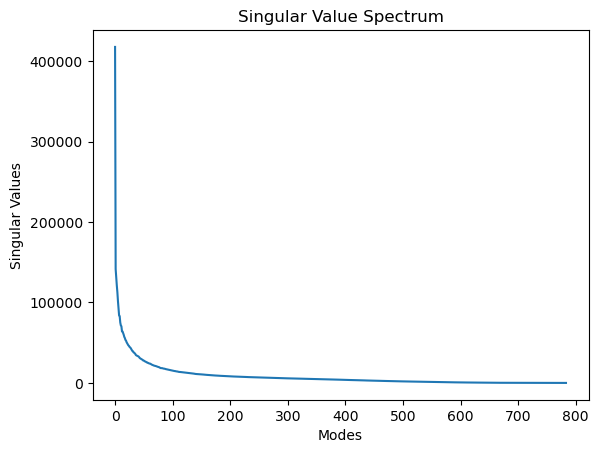

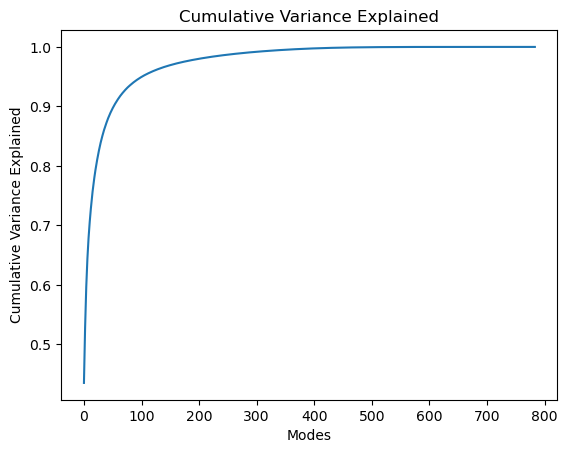

Rank r for 95% variance: 102


In [6]:
# Singular Value Spectrum
plt.plot(S)
plt.xlabel("Modes")
plt.ylabel("Singular Values")
plt.title("Singular Value Spectrum")
plt.show()

# Cumulative Variance Explained
explained_variance_ratio = S ** 2 / np.sum(S ** 2)
cumulative_variance_explained = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_explained)
plt.xlabel("Modes")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Explained")
plt.show()

# Determine the number of modes necessary for good image reconstruction
desired_variance = 0.95
rank_r = np.argmax(cumulative_variance_explained >= desired_variance) + 1
print(f"Rank r for 95% variance: {rank_r}")

In [7]:
# Setting number of components as enough for 95% variance
n_components = 102

U_reduced = U[:, :n_components]
S_reduced = np.diag(S[:n_components])
Vt_reduced = Vt[:n_components, :]

X_reduced = U_reduced @ S_reduced
print("X_reduced shape:", X_reduced.shape)

X_reduced shape: (70000, 102)


## Problem 3

The interpretation of the U, Σ, and V matrices:

U: The left-singular vectors representing the orthonormal basis of the image space. Each column of U can be viewed as an "eigen-image" that is a linear combination of the original images.

Σ: The diagonal matrix containing the singular values, which indicate the importance of each mode in capturing the variance in the data.

V: The right-singular vectors representing the orthonormal basis of the feature space. Each row of V represents a different image in the transformed space.


## Problem 4

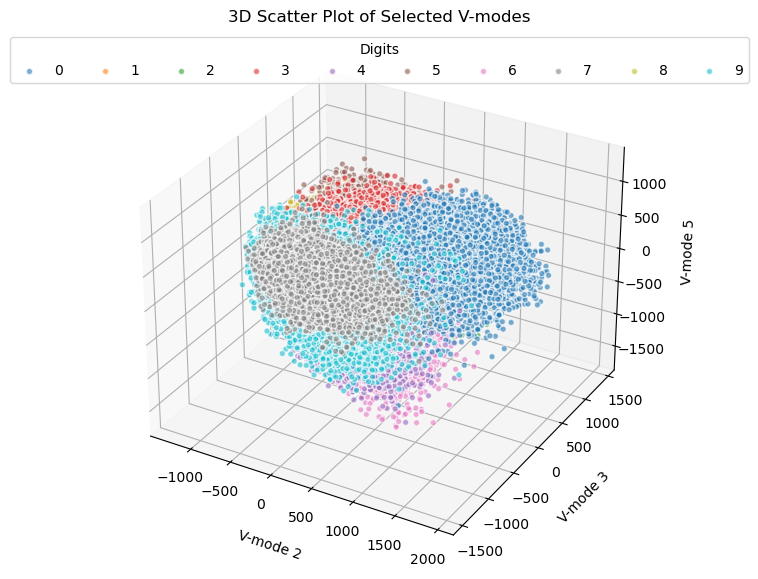

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Select the V-modes (columns) to be plotted
selected_columns = [1, 2, 4]
X_selected = X_reduced[:, selected_columns]

Y_int = Y.astype(int)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Use a colormap to map the digit labels (0-9) to colors
colors = plt.cm.get_cmap('tab10', 10)

for i in range(10):
    indices = Y_int == i
    ax.scatter(X_selected[indices, 0], X_selected[indices, 1], X_selected[indices, 2], color=colors(i), label=str(i), alpha=0.6, edgecolors='w')

# Set axes labels with padding
ax.set_xlabel('V-mode 2', labelpad=10)
ax.set_ylabel('V-mode 3', labelpad=10)
ax.set_zlabel('V-mode 5', labelpad=10)

# Add title and configure legend
ax.set_title('3D Scatter Plot of Selected V-modes')
ax.legend(title="Digits", loc='upper center', ncol=10)

plt.show()

## Classifier

In [9]:
from sklearn.model_selection import train_test_split

# Split the reduced data and labels into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.3, random_state=42)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Function for training LDA classifier on digits
def train_lda_classifier(X_train, Y_train, digits):
    # Filter the training data to only include specified digits
    mask = np.isin(Y_train, digits)
    X_filtered = X_train[mask]
    Y_filtered = Y_train[mask]

    # Train the LDA classifier
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_filtered, Y_filtered)

    return lda

# Function for testing LDA classifier on digits
def test_lda_classifier(lda, X_test, Y_test, digits):
    # Filter the test data to only include specified digits
    mask = np.isin(Y_test, digits)
    X_filtered = X_test[mask]
    Y_filtered = Y_test[mask]

    # Predict the labels using the LDA classifier
    Y_pred = lda.predict(X_filtered)

    # Calculate the accuracy
    accuracy = np.mean(Y_pred == Y_filtered)

    return accuracy

### 2 Digit LDA

In [40]:
digits_2 = ['0', '2']
lda_classifier_2_digits = train_lda_classifier(X_train, Y_train, digits_2)
test_accuracy_2_digits = test_lda_classifier(lda_classifier_2_digits, X_test, Y_test, digits_2)
train_accuracy_2_digits = test_lda_classifier(lda_classifier_2_digits, X_train, Y_train, digits_2)

print(f"LDA classifier accuracy on test set of digits {digits_2}: {test_accuracy_2_digits * 100:.2f}%")
print(f"LDA classifier accuracy on train set of digits {digits_2}: {train_accuracy_2_digits * 100:.2f}%")

LDA classifier accuracy on test set of digits ['0', '2']: 98.38%
LDA classifier accuracy on train set of digits ['0', '2']: 98.57%


### 3 Digit LDA

In [41]:
digits_3 = ['0', '2', '5']
lda_classifier_3_digits = train_lda_classifier(X_train, Y_train, digits_3)
test_accuracy_3_digits = test_lda_classifier(lda_classifier_3_digits, X_test, Y_test, digits_3)
train_accuracy_3_digits = test_lda_classifier(lda_classifier_3_digits, X_train, Y_train, digits_3)

print(f"LDA classifier accuracy on test sets of digits {digits_3}: {test_accuracy_3_digits * 100:.2f}%")
print(f"LDA classifier accuracy on train sets of digits {digits_3}: {train_accuracy_3_digits * 100:.2f}%")

LDA classifier accuracy on test sets of digits ['0', '2', '5']: 96.15%
LDA classifier accuracy on train sets of digits ['0', '2', '5']: 96.22%


### 10 Digit LDA

In [42]:
digits_10 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
lda_classifier_10_digits = train_lda_classifier(X_train, Y_train, digits_10)
test_accuracy_10_digits = test_lda_classifier(lda_classifier_10_digits, X_test, Y_test, digits_10)
train_accuracy_10_digits = test_lda_classifier(lda_classifier_10_digits, X_train, Y_train, digits_10)

print(f"LDA classifier accuracy on test sets of digits {digits_10}: {test_accuracy_10_digits * 100:.2f}%")
print(f"LDA classifier accuracy on train sets of digits {digits_10}: {train_accuracy_10_digits * 100:.2f}%")

LDA classifier accuracy on test sets of digits ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']: 86.84%
LDA classifier accuracy on train sets of digits ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']: 87.14%


### Easiest and Hardest Pairs of Digits to Separate

In [27]:
from itertools import combinations

unique_digits = np.unique(Y)
digit_pairs = list(combinations(unique_digits, 2))

test_accuracies = []
train_accuracies = []

for pair in digit_pairs:
    lda_classifier_pair = train_lda_classifier(X_train, Y_train, pair)

    test_accuracy_pair = test_lda_classifier(lda_classifier_pair, X_test, Y_test, pair)
    test_accuracies.append(test_accuracy_pair)
    
    train_accuracy_pair = test_lda_classifier(lda_classifier_pair, X_train, Y_train, pair)
    train_accuracies.append(train_accuracy_pair)

    print(f"LDA classifier accuracy on test set for digits {pair}: {test_accuracy_pair * 100:.2f}%")
    print(f"LDA classifier accuracy on train set for digits {pair}: {train_accuracy_pair * 100:.2f}%")

max_test_accuracy_index = np.argmax(test_accuracies)
min_test_accuracy_index = np.argmin(test_accuracies)

max_train_accuracy_index = np.argmax(train_accuracies)
min_train_accuracy_index = np.argmin(train_accuracies)

easiest_test_digits = digit_pairs[max_test_accuracy_index]
hardest_test_digits = digit_pairs[min_test_accuracy_index]

easiest_train_digits = digit_pairs[max_train_accuracy_index]
hardest_train_digits = digit_pairs[min_train_accuracy_index]

print(f"\nThe easiest digits to separate on the test set are {easiest_test_digits} with an accuracy of {test_accuracies[max_test_accuracy_index] * 100:.2f}%")
print(f"The hardest digits to separate on the test set are {hardest_test_digits} with an accuracy of {test_accuracies[min_test_accuracy_index] * 100:.2f}%")

print(f"\nThe easiest digits to separate on the train set are {easiest_train_digits} with an accuracy of {train_accuracies[max_train_accuracy_index] * 100:.2f}%")
print(f"The hardest digits to separate on the train set are {hardest_train_digits} with an accuracy of {train_accuracies[min_train_accuracy_index] * 100:.2f}%")

LDA classifier accuracy on test set for digits ('0', '1'): 99.64%
LDA classifier accuracy on train set for digits ('0', '1'): 99.57%
LDA classifier accuracy on test set for digits ('0', '2'): 98.38%
LDA classifier accuracy on train set for digits ('0', '2'): 98.57%
LDA classifier accuracy on test set for digits ('0', '3'): 98.94%
LDA classifier accuracy on train set for digits ('0', '3'): 99.30%
LDA classifier accuracy on test set for digits ('0', '4'): 99.52%
LDA classifier accuracy on train set for digits ('0', '4'): 99.52%
LDA classifier accuracy on test set for digits ('0', '5'): 98.31%
LDA classifier accuracy on train set for digits ('0', '5'): 98.52%
LDA classifier accuracy on test set for digits ('0', '6'): 98.89%
LDA classifier accuracy on train set for digits ('0', '6'): 99.04%
LDA classifier accuracy on test set for digits ('0', '7'): 99.58%
LDA classifier accuracy on train set for digits ('0', '7'): 99.57%
LDA classifier accuracy on test set for digits ('0', '8'): 98.67%
LDA

In [36]:
# Combine digit pairs with their corresponding test and train accuracies
digit_pair_accuracies = list(zip(digit_pairs, test_accuracies, train_accuracies))

# Sort by highest test accuracy
sorted_digit_pair_accuracies = sorted(digit_pair_accuracies, key=lambda x: x[1], reverse=True)

# Print the table header
print("|Rank | Digit Pair | Test Set Accuracy | Train Set Accuracy|")
print("|-----|------------|------------------|--------------------|")

# Print the sorted table
for rank, (digit_pair, test_accuracy, train_accuracy) in enumerate(sorted_digit_pair_accuracies, start=1):
    print(f"|{rank:4} | {digit_pair} |{test_accuracy * 100:16.2f}% |   {train_accuracy * 100:15.2f}% |")


|Rank | Digit Pair | Test Set Accuracy | Train Set Accuracy|
|-----|------------|------------------|--------------------|
|   1 | ('6', '7') |           99.75% |             99.77% |
|   2 | ('1', '4') |           99.65% |             99.50% |
|   3 | ('0', '1') |           99.64% |             99.57% |
|   4 | ('0', '7') |           99.58% |             99.57% |
|   5 | ('6', '9') |           99.57% |             99.71% |
|   6 | ('1', '6') |           99.55% |             99.61% |
|   7 | ('0', '4') |           99.52% |             99.52% |
|   8 | ('1', '9') |           99.48% |             99.54% |
|   9 | ('5', '7') |           99.45% |             99.22% |
|  10 | ('0', '9') |           99.18% |             99.33% |
|  11 | ('1', '7') |           99.18% |             99.19% |
|  12 | ('3', '4') |           99.03% |             99.11% |
|  13 | ('3', '6') |           99.02% |             99.27% |
|  14 | ('1', '5') |           99.00% |             99.14% |
|  15 | ('0', '3') |    

In [14]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train_svm_classifier(X_train, Y_train, kernel='linear', C=1):
    svm = LinearSVC(C=C, dual=False, multi_class='ovr', random_state=42)
    svm.fit(X_train, Y_train)
    return svm

def test_svm_classifier(svm, X_test, Y_test):
    Y_pred = svm.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    return accuracy

def train_decision_tree_classifier(X_train, Y_train, criterion='gini', max_depth=None):
    dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    dt.fit(X_train, Y_train)
    return dt

def test_decision_tree_classifier(dt, X_test, Y_test):
    Y_pred = dt.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    return accuracy

In [15]:
# Train SVM and Decision Tree classifiers
svm_classifier = train_svm_classifier(X_train, Y_train)
dt_classifier = train_decision_tree_classifier(X_train, Y_train)

# Testing SVM and Decision Tree classifiers performance on test data set
svm_test_accuracy = test_svm_classifier(svm_classifier, X_test, Y_test)
dt_test_accuracy = test_decision_tree_classifier(dt_classifier, X_test, Y_test)
print(f"SVM classifier accuracy on test data set: {svm_test_accuracy * 100:.2f}%")
print(f"Decision Tree classifier accuracy on test data set: {dt_test_accuracy * 100:.2f}%")

# Testing SVM and Decision Tree classifiers performance on train data set
svm_train_accuracy = test_svm_classifier(svm_classifier, X_train, Y_train)
dt_train_accuracy = test_decision_tree_classifier(dt_classifier, X_train, Y_train)
print(f"SVM classifier accuracy on train data set: {svm_train_accuracy * 100:.2f}%")
print(f"Decision Tree classifier accuracy on train data set: {dt_train_accuracy * 100:.2f}%")

SVM classifier accuracy on test data set: 90.65%
Decision Tree classifier accuracy on test data set: 82.88%
SVM classifier accuracy on train data set: 91.03%
Decision Tree classifier accuracy on train data set: 100.00%


In [ ]:
unique_digits = np.unique(Y)
digit_pairs = list(combinations(unique_digits, 2))

svm_test_accuracies = {}
dt_test_accuracies = {}
svm_train_accuracies = {}
dt_train_accuracies = {}

for pair in digit_pairs:
    # Filter the training and test data for the current pair of digits
    mask_train = np.isin(Y_train, pair)
    X_train_pair = X_train[mask_train]
    Y_train_pair = Y_train[mask_train]
    
    mask_test = np.isin(Y_test, pair)
    X_test_pair = X_test[mask_test]
    Y_test_pair = Y_test[mask_test]

    # Train the SVM and Decision Tree classifiers
    svm_classifier_pair = train_svm_classifier(X_train_pair, Y_train_pair)
    dt_classifier_pair = train_decision_tree_classifier(X_train_pair, Y_train_pair)
    
    # Test the SVM and Decision Tree classiers on test set
    svm_test_accuracy_pair = test_svm_classifier(svm_classifier_pair, X_test_pair, Y_test_pair)
    svm_test_accuracies[pair] = svm_test_accuracy_pair
    
    dt_test_accuracy_pair = test_decision_tree_classifier(dt_classifier_pair, X_test_pair, Y_test_pair)
    dt_test_accuracies[pair] = dt_test_accuracy_pair
    
    # Test the SVM and Decision Tree classiers on train set
    svm_train_accuracy_pair = test_svm_classifier(svm_classifier_pair, X_train_pair, Y_train_pair)
    svm_train_accuracies[pair] = svm_train_accuracy_pair
    dt_train_accuracy_pair = test_decision_tree_classifier(dt_classifier_pair, X_train_pair, Y_train_pair)
    dt_train_accuracies[pair] = dt_train_accuracy_pair

In [37]:
# Combine digit pairs with their corresponding test and train accuracies for SVM and Decision Tree classifiers
svm_digit_pair_accuracies = [(pair, svm_test_accuracies[pair], svm_train_accuracies[pair]) for pair in digit_pairs]
dt_digit_pair_accuracies = [(pair, dt_test_accuracies[pair], dt_train_accuracies[pair]) for pair in digit_pairs]

# Sort by highest test accuracy
sorted_svm_digit_pair_accuracies = sorted(svm_digit_pair_accuracies, key=lambda x: x[1], reverse=True)
sorted_dt_digit_pair_accuracies = sorted(dt_digit_pair_accuracies, key=lambda x: x[1], reverse=True)

# Function to print the sorted table
def print_table(sorted_accuracies, classifier_name):
    print(f"{classifier_name} Classifier")
    print("Rank | Digit Pair | Test Set Accuracy | Train Set Accuracy")
    print("-----|------------|------------------|-------------------")
    for rank, (digit_pair, test_accuracy, train_accuracy) in enumerate(sorted_accuracies, start=1):
        print(f"{rank:4} | {digit_pair}    | {test_accuracy * 100:16.2f}% | {train_accuracy * 100:15.2f}%")
    print("\n")

# Print the sorted tables for SVM and Decision Tree classifiers
print_table(sorted_svm_digit_pair_accuracies, "SVM")
print_table(sorted_dt_digit_pair_accuracies, "Decision Tree")

SVM Classifier
Rank | Digit Pair | Test Set Accuracy | Train Set Accuracy
-----|------------|------------------|-------------------
   1 | ('0', '1')    |            99.84% |          100.00%
   2 | ('6', '7')    |            99.84% |          100.00%
   3 | ('1', '6')    |            99.80% |          100.00%
   4 | ('6', '9')    |            99.71% |          100.00%
   5 | ('1', '4')    |            99.65% |          100.00%
   6 | ('1', '7')    |            99.46% |           99.94%
   7 | ('3', '6')    |            99.41% |          100.00%
   8 | ('0', '7')    |            99.40% |          100.00%
   9 | ('0', '4')    |            99.32% |          100.00%
  10 | ('0', '3')    |            99.32% |           99.73%
  11 | ('1', '9')    |            99.30% |           99.98%
  12 | ('1', '5')    |            99.30% |           99.85%
  13 | ('5', '7')    |            99.28% |           99.54%
  14 | ('3', '4')    |            99.05% |           99.73%
  15 | ('4', '5')    |      